In [13]:
import sys
sys.path.append('/home/ubuntu/workspace/einops')

In [14]:
# import utils

In [15]:
# Examples are given for numpy. This code also setups ipython/jupyter
# so that numpy arrays in the output are displayed as images
import numpy
from utils import display_np_arrays_as_images
display_np_arrays_as_images()

In [16]:
ims = numpy.load('../resources/test_images.npy', allow_pickle=False)
# There are 6 images of shape 96x96 with 3 color channels packed into tensor
print(ims.shape, ims.dtype)

(6, 96, 96, 3) float64


In [17]:
ims[5].shape

(96, 96, 3)

In [18]:
from einops import rearrange, reduce, repeat

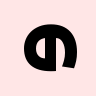

In [19]:
rearrange(ims[0], 'h w c -> w h c')

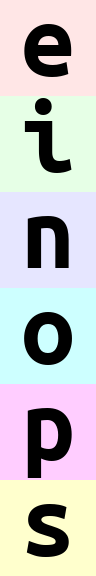

In [20]:
rearrange(ims, 'b h w c -> (b h) w c')

In [21]:
rearrange(ims, 'b h w c ->  h (b w) c').shape

(96, 576, 3)

In [22]:
rearrange(ims, '(b1 b2) h w c -> b1 b2 h w c', b2=3).shape

(2, 3, 96, 96, 3)

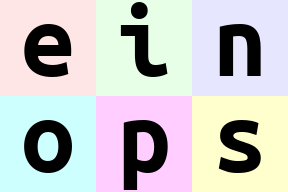

In [23]:
rearrange(ims, '(b1 b2) h w c -> (b1 h) (b2 w) c', b1=2)

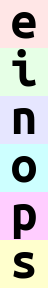

In [24]:
reduce(ims, 'b (h h2) (w w2) c -> (b h) w c', 'mean', h2=2, w2=2)